In [99]:
from data_loader_utility import get_tabular_data, label_dict
from scipy.stats import describe, entropy
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import cv2

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.utils._param_validation import InvalidParameterError
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
def random_forest(xtrain, xtest, ytrain, ytest, grid_to_search={}):
    """Fit a random forest classifier and display performance metrics (acc/prec/rec/f1) and confusion matrix."""
    np.random.seed(64)

    rfc = RandomForestClassifier()
    try:
        optimal = GridSearchCV(rfc, grid_to_search, refit=True)
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)
    except InvalidParameterError as e:
        print(f'{e}\nAttempting to fit with a default Random Forest classifier.')
        optimal = RandomForestClassifier()
        # print("here here")
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)

    # optimal.fit(xtrain, ytrain)
    # internal_preds = optimal.predict(xtest)

    # check performance
    print('MODEL PERFORMANCE:\n-------------\naccuracy: ', metrics.accuracy_score(ytest, internal_preds),
          '\nprecision: ', metrics.precision_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nrecall: ', metrics.recall_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nf1-score: ', metrics.f1_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'))
    confmat_internal = metrics.confusion_matrix(ytest, internal_preds)
    show_confmat_internal = metrics.ConfusionMatrixDisplay(confmat_internal)
    show_confmat_internal.plot()
    plt.show()


def k_nearest_neighbors(xtrain, xtest, ytrain, ytest, grid_to_search={}):
    """Fit a KNN classifier and display performance metrics (acc/prec/rec/f1) and confusion matrix"""
    np.random.seed(64)

    knn = KNeighborsClassifier()
    try:
        optimal = GridSearchCV(knn, grid_to_search, refit=True)
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)
    except InvalidParameterError as e:
        print(f'{e}\nAttempting to fit with a default KNN classifier.')
        optimal = KNeighborsClassifier()
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)

    # optimal.fit(xtrain, ytrain)
    # internal_preds = optimal.predict(xtest)

    # check performance
    print('MODEL PERFORMANCE:\n-------------\naccuracy: ', metrics.accuracy_score(ytest, internal_preds),
          '\nprecision: ', metrics.precision_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nrecall: ', metrics.recall_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nf1-score: ', metrics.f1_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'))
    confmat_internal = metrics.confusion_matrix(ytest, internal_preds)
    show_confmat_internal = metrics.ConfusionMatrixDisplay(confmat_internal)
    show_confmat_internal.plot()
    plt.show()


def support_vector_machine(xtrain, xtest, ytrain, ytest, grid_to_search={}):
    """Fit a support vector machine classifier and display performance metrics (acc/prec/rec/f1) and confusion matrix"""
    np.random.seed(64)

    svm = SVC()
    try:
        optimal = GridSearchCV(svm, grid_to_search, refit=True)
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)
    except InvalidParameterError as e:
        print(f'{e}\nAttempting to fit with a default SVM classifier.')
        optimal = SVC()
        optimal.fit(xtrain, ytrain)
        internal_preds = optimal.predict(xtest)
    
    # optimal.fit(xtrain, ytrain)
    # internal_preds = optimal.predict(xtest)

    # check performance
    print('MODEL PERFORMANCE:\n-------------\naccuracy: ', metrics.accuracy_score(ytest, internal_preds),
          '\nprecision: ', metrics.precision_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nrecall: ', metrics.recall_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'),
          '\nf1-score: ', metrics.f1_score(ytest, internal_preds, labels=[int(x) for x in list(set(ytrain))], average='macro'))
    confmat_internal = metrics.confusion_matrix(ytest, internal_preds)
    show_confmat_internal = metrics.ConfusionMatrixDisplay(confmat_internal)
    show_confmat_internal.plot()
    plt.show()


In [48]:
train_data, train_labels, test_data, test_labels = get_tabular_data()

In [49]:
print(train_data.shape)
print(train_labels.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [50]:
reshaped_X_train = train_data.reshape(-1,784)
reshaped_y_train = train_labels.reshape(-1,1)
df_data = np.append(reshaped_X_train,reshaped_y_train,axis = 1)
df = pd.DataFrame(df_data, columns=[f"pixel_{i}" if i <= 783 else "label" for i in range(785)])
df.shape

(60000, 785)

In [51]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


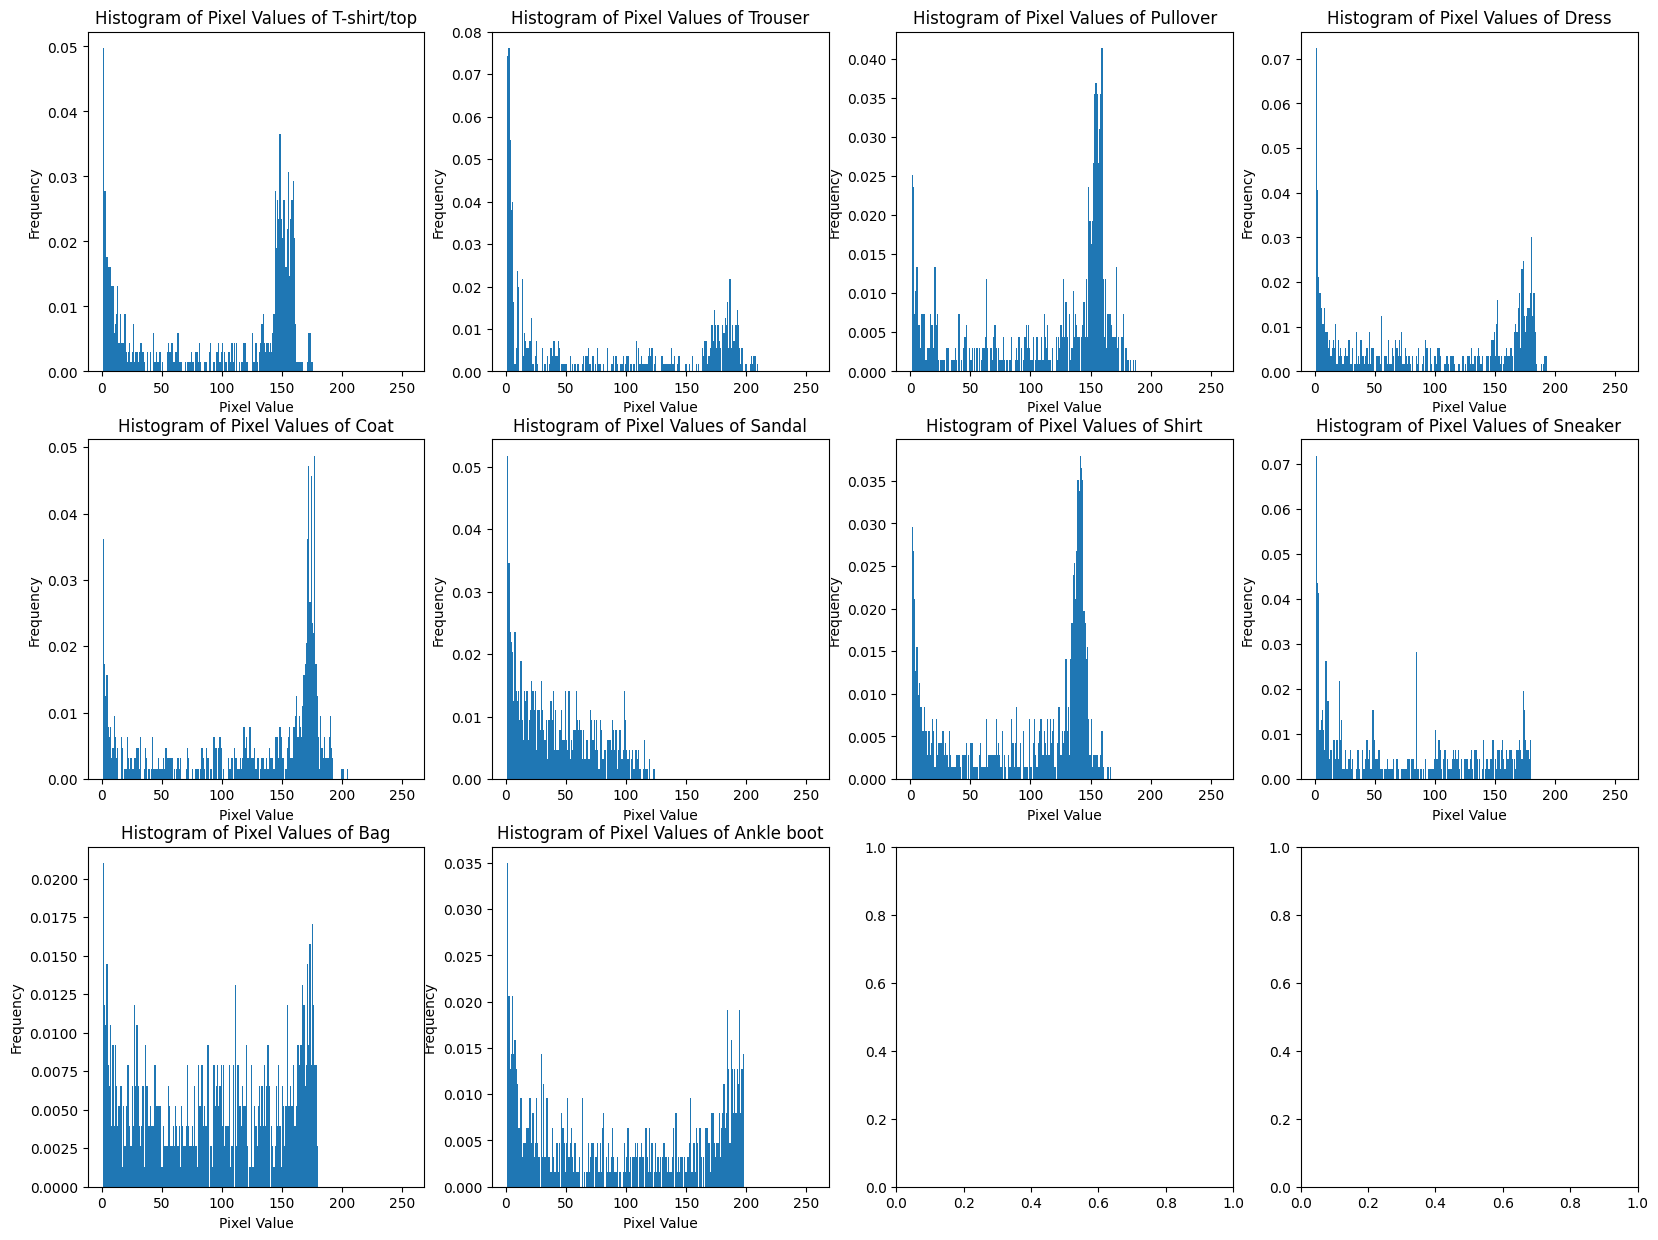

In [114]:
fig, ax6 = plt.subplots(3,4, figsize=(20,15))
ax6 = ax6.flatten()
for i in range(0,10):
    gray_image = df.loc[df['label'] == i].mean(axis=0).drop('label').values
    ax6[i].hist(gray_image, bins=255, range=[1, 256], density=True, cumulative=False)
    ax6[i].set_title(f'Histogram of Pixel Values of {label_dict[i]}')
    ax6[i].set_xlabel('Pixel Value')
    ax6[i].set_ylabel('Frequency')
plt.show()

* histogram of all classes except the class sandal exhibits bimodal (two peaks) distribution. A unimodal distribution is common in well-exposed images, while a bimodal distribution may indicate the presence of distinct foreground and background regions which can help classification.

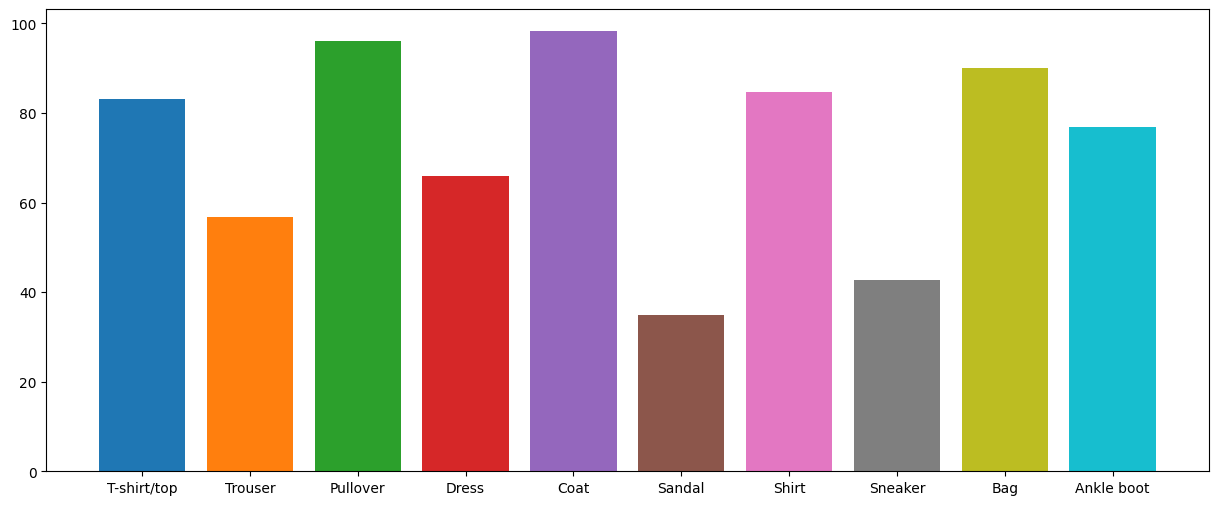

In [52]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
for i in range(0,10):
    ax.bar(label_dict[i],df.loc[df['label'] == i].mean(axis=0).drop('label').mean())

* As the images are in grayscale, if the image have more pixes close to 255(white) the mean will be higher, in which case the classes pullover, coat, bag, T-shirt/top have higher mean as we calculated above.

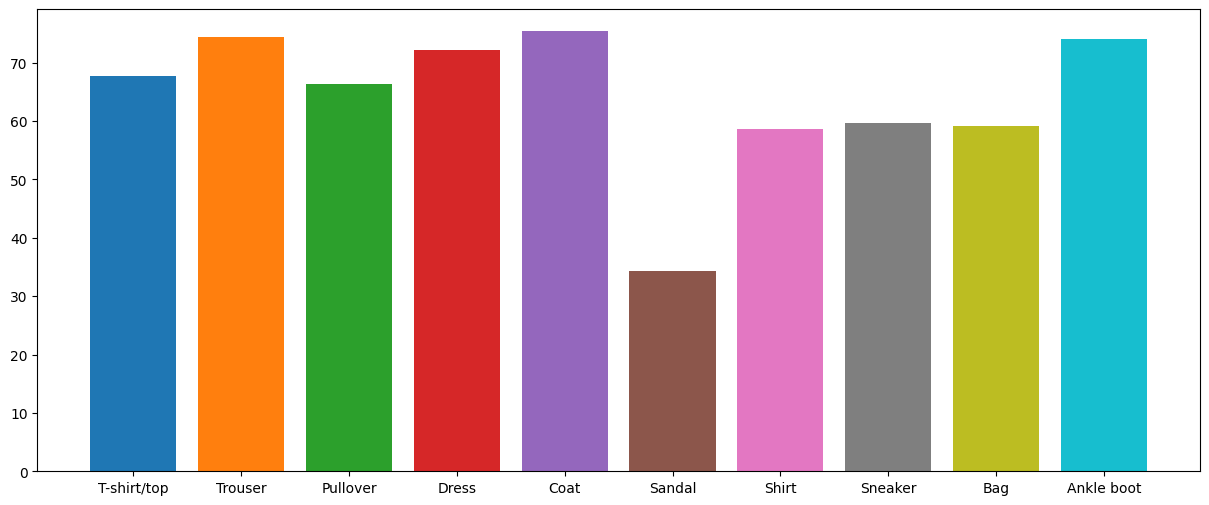

In [110]:
fig, ax5 = plt.subplots(1,1, figsize=(15,6))
for i in range(0,10):
    ax5.bar(label_dict[i],df.loc[df['label'] == i].mean(axis=0).drop('label').std())

* a higher standard deviation can indicate the presence of diverse textures or patterns, which may be useful in classification process. Also, a higher standard deviation is often associated with greater contrast. Images with higher contrast may contain more details and be visually more appealing.

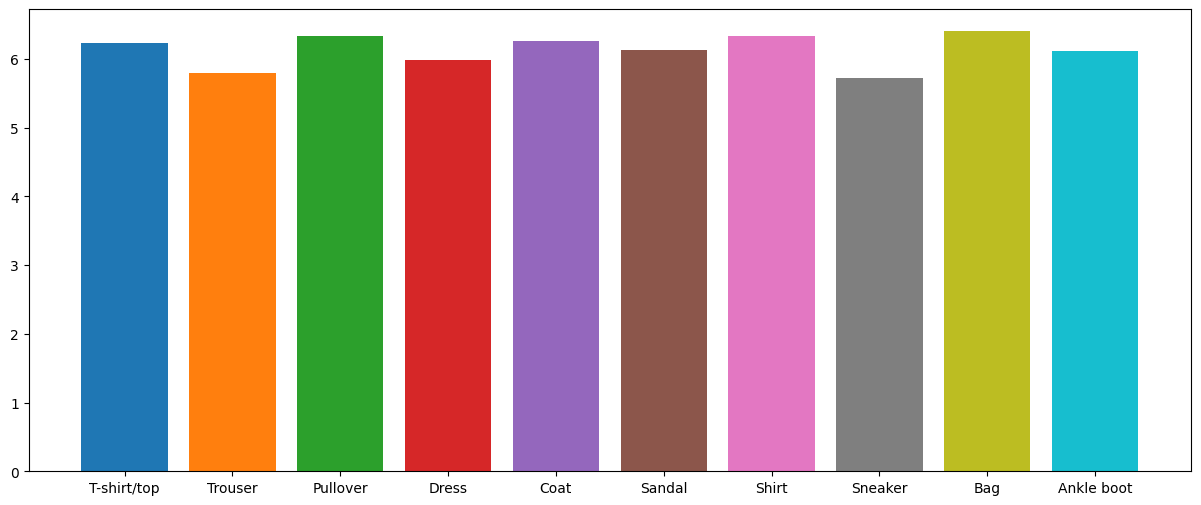

In [62]:
fig, ax1 = plt.subplots(1,1, figsize=(15,6))
for i in range(0,10):
    ax1.bar(label_dict[i],entropy(df.loc[df['label'] == i].mean(axis=0).drop('label').values))

* Higher Entropy: If the entropy is high, it suggests that the pixel values in the image have a wide range of intensities, and there is a greater degree of variability or complexity in the image. This could be indicative of textures, patterns, or details in the image.

* Lower Entropy: A lower entropy value indicates a more uniform or predictable distribution of pixel intensities. This might occur in regions of the image with constant intensity, smooth gradients, or less information content.

* As we can see the entropy values for all our classes is high, which means there is a good detail in images or features that can be used for image classification

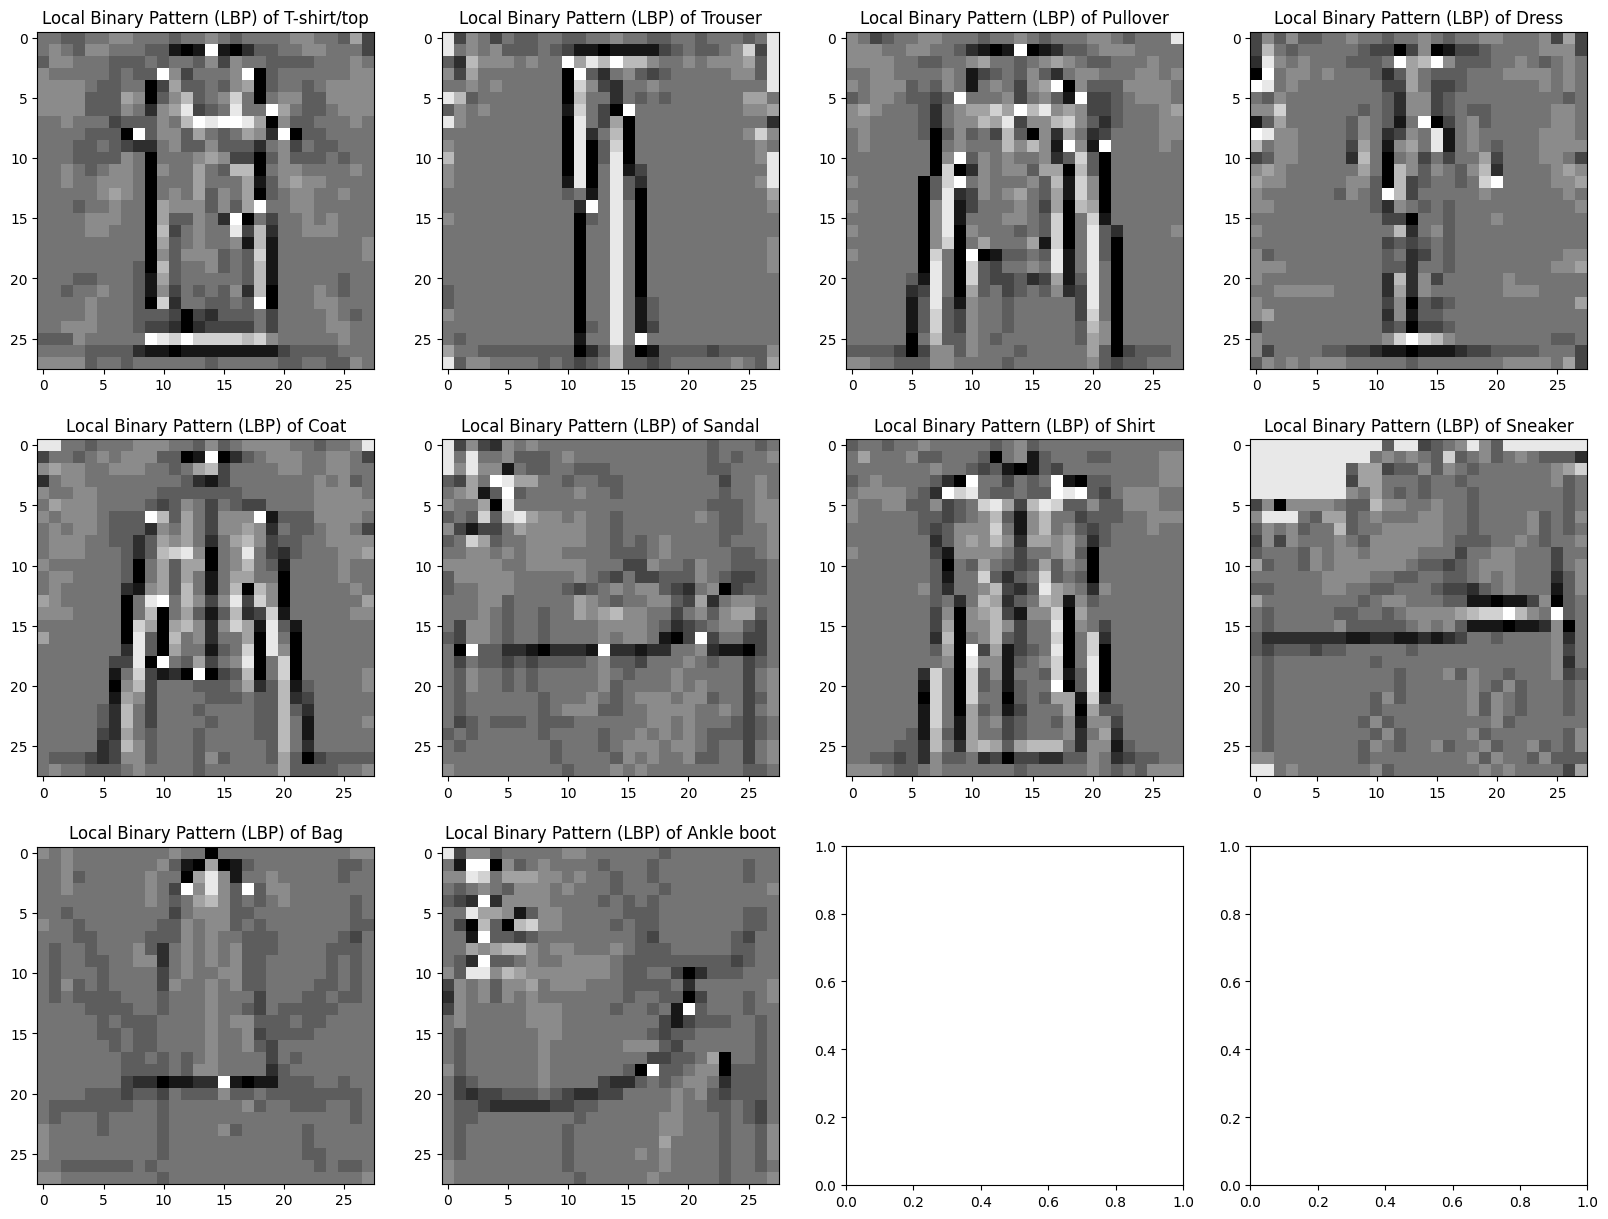

In [84]:
fig, ax2 = plt.subplots(3,4, figsize=(20,15))
ax2 = ax2.flatten()
for i in range(0,10):
    gray_image = df.loc[df['label'] == i].mean(axis=0).drop('label').values.reshape(28,28)
    gray_image = gray_image.reshape(28,28)

    lbp = feature.local_binary_pattern(gray_image, P=10, R=1, method='uniform')
    ax2[i].imshow(lbp, cmap='gray')
    ax2[i].set_title(f'Local Binary Pattern (LBP) of {label_dict[i]}')
plt.show()

Local Binary Pattern (LBP) is a texture descriptor used in computer vision and image analysis. It was introduced to capture local patterns and textures in an image. LBP describes the spatial structure of an image by considering the relationship between the intensity of a central pixel and its surrounding neighbors.

Hence it is decribing the patterns we expect from our image classes according to thier structure

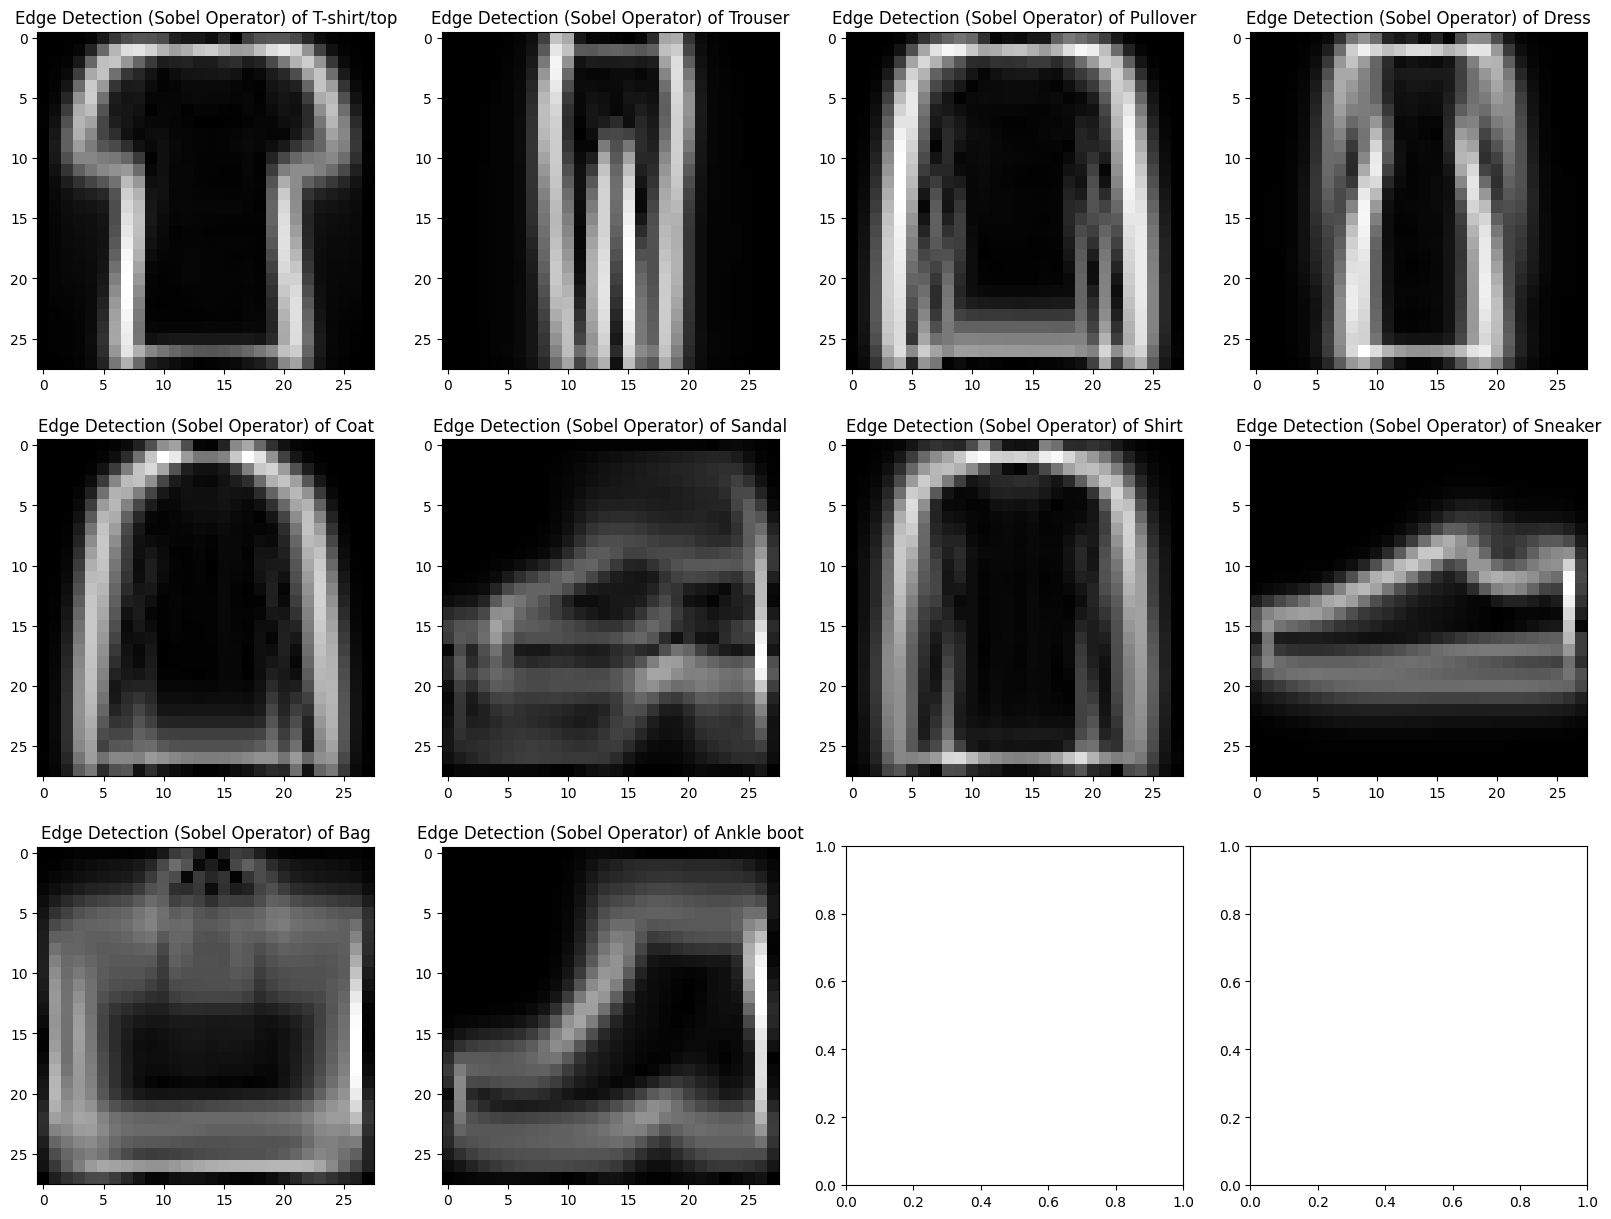

In [108]:
# Edge Detection (Sobel Operator)
fig, ax4 = plt.subplots(3,4, figsize=(20,15))
ax4 = ax4.flatten()
for i in range(0,10):
    gray_image = df.loc[df['label'] == i].mean(axis=0).drop('label').values.reshape(28,28)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    ax4[i].imshow(edge_magnitude, cmap='gray')
    ax4[i].set_title(f'Edge Detection (Sobel Operator) of {label_dict[i]}')
plt.show()

In [141]:
print(train_data.shape)
print(train_labels.reshape(-1,1).shape)

torch.Size([60000, 784])
torch.Size([60000, 1])


In [143]:
random_forest(
    train_data,
    test_data,
    train_labels,
    test_labels,
)

here here
